## Data Cleaning

In this file, I will explore the dataset, thoroughly clean it and fill out any empty values.

### Load packages

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

### Read and explore dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/great_customers.csv")
df.head()

,user_id,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
0,1004889,14.0,private,70773.00,9,Never-married,sales,not_caucasian,Male,0.0,0.0,40,399.0,NaN,0
1,1012811,25.0,private,76597.00,9,Divorced,sales,caucasian,Female,0.0,0.0,30,256.0,NaN,0
2,1006870,21.0,private,47947.25,10,Never-married,clerical,caucasian,Female,0.0,0.0,10,442.0,276.0,0
3,1022149,23.0,private,41740.25,7,Divorced,sales,caucasian,Female,0.0,0.0,20,NaN,NaN,0
4,1029558,26.0,private,NaN,9,Married,sales,not_caucasian,Male,NaN,0.0,36,NaN,120.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 13599 non-null  int64  
 1   age                     13178 non-null  float64
 2   workclass               13056 non-null  object 
 3   salary                  13177 non-null  float64
 4   education_rank          13599 non-null  int64  
 5   marital-status          13599 non-null  object 
 6   occupation              13056 non-null  object 
 7   race                    13599 non-null  object 
 8   sex                     13599 non-null  object 
 9   mins_beerdrinking_year  13175 non-null  float64
 10  mins_exercising_year    13178 non-null  float64
 11  works_hours             13599 non-null  int64  
 12  tea_per_year            11170 non-null  float64
 13  coffee_per_year         11188 non-null  float64
 14  great_customer_class    13599 non-null

In [4]:
df.columns

Index(['user_id', 'age', 'workclass', 'salary', 'education_rank',
       'marital-status', 'occupation', 'race', 'sex', 'mins_beerdrinking_year',
       'mins_exercising_year', 'works_hours', 'tea_per_year',
       'coffee_per_year', 'great_customer_class'],
      dtype='object')

### Split Data into Categorical and Numeric

In [5]:
cat_df = df[['workclass', 'marital-status','occupation','race', 'sex']]
num_df = df[['user_id', 'age', 'salary',
       'education_rank', 'mins_beerdrinking_year', 'mins_exercising_year', 
            'works_hours', 'tea_per_year', 'coffee_per_year', 'great_customer_class']]
y = df[['great_customer_class']]

### Explore Empty Values in Categorical Data

<AxesSubplot:>

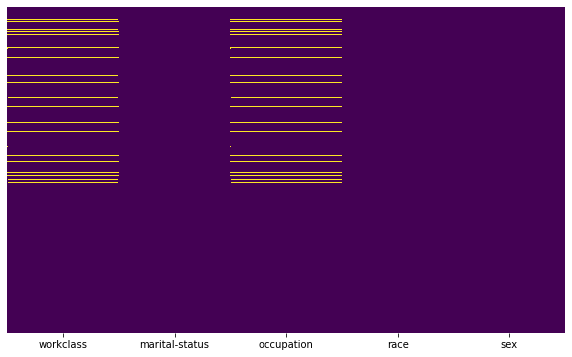

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [7]:
cat_df.workclass.value_counts()

self_employed    5972
private          5957
government       1127
Name: workclass, dtype: int64

In [8]:
cat_df.occupation.value_counts()

tech            5234
craft           1114
clerical         999
professional     984
service          973
executive        953
sales            920
factory          555
trucker          414
cleaner          399
farm             301
lawenf           161
estate_agent      47
soldier            2
Name: occupation, dtype: int64

### Fill Empty Values with the Most Frequent Result

In [9]:
cat_df['workclass'].fillna('self_employed', inplace=True)
cat_df.workclass.value_counts()

C:\Users\sheri\anaconda3\envs\ml-venv\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


self_employed    6515
private          5957
government       1127
Name: workclass, dtype: int64

In [10]:
cat_df['occupation'].fillna('tech', inplace=True)
cat_df.occupation.value_counts()

tech            5777
craft           1114
clerical         999
professional     984
service          973
executive        953
sales            920
factory          555
trucker          414
cleaner          399
farm             301
lawenf           161
estate_agent      47
soldier            2
Name: occupation, dtype: int64

In [11]:
# checking others
print(cat_df["marital-status"].value_counts(), "\n")
print(cat_df["race"].value_counts(), "\n")
print(cat_df["sex"].value_counts(), "\n")

Divorced         6625
Married          3559
Never-married    3141
Widowed           274
Name: marital-status, dtype: int64 

caucasian        12313
not_caucasian     1286
Name: race, dtype: int64 

Male      10597
Female     3002
Name: sex, dtype: int64 



### Make Sure There Are No Empty Values

<AxesSubplot:>

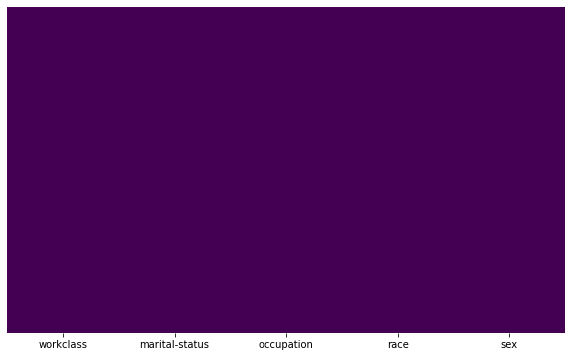

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Explore Empty Values in Numeric Data

<AxesSubplot:>

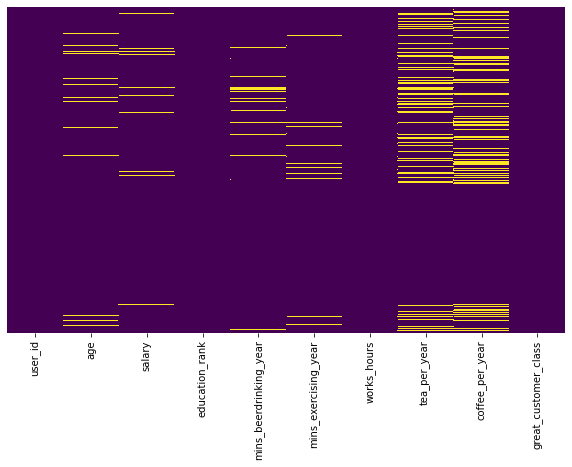

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Fill out NA with Means

In [14]:
imputer = SimpleImputer(strategy='mean')

In [15]:
imputer.fit(num_df)
num_df_transform = imputer.transform(num_df)

In [16]:
num_df = pd.DataFrame(data=num_df_transform)
num_df.columns = ['user_id', 'age', 'salary',
       'education_rank', 'mins_beerdrinking_year', 'mins_exercising_year', 
            'works_hours', 'tea_per_year', 'coffee_per_year', 'great_customer_class']
num_df

,user_id,age,salary,education_rank,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
0,1004889.0,14.0,70773.000000,9.0,0.000000,0.000000,40.0,399.000000,359.708169,0.0
1,1012811.0,25.0,76597.000000,9.0,0.000000,0.000000,30.0,256.000000,359.708169,0.0
2,1006870.0,21.0,47947.250000,10.0,0.000000,0.000000,10.0,442.000000,276.000000,0.0
3,1022149.0,23.0,41740.250000,7.0,0.000000,0.000000,20.0,217.276544,359.708169,0.0
4,1029558.0,26.0,37149.297355,9.0,447.920607,0.000000,36.0,217.276544,120.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
13594,1016807.0,42.0,55293.000000,13.0,0.000000,46.034224,40.0,277.000000,268.000000,1.0
13595,1038859.0,58.0,25928.250000,14.0,0.000000,0.000000,40.0,337.000000,359.708169,1.0
13596,1041214.0,75.0,16590.000000,7.0,447.920607,0.000000,35.0,217.276544,359.708169,1.0
13597,1038013.0,45.0,25536.750000,11.0,0.000000,0.000000,40.0,99.000000,79.000000,1.0


### Make Sure There Are No Empty Values

<AxesSubplot:>

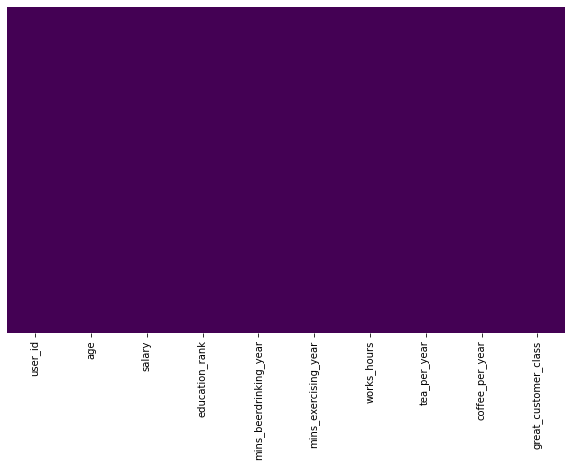

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Concatenate Two Datasets

In [19]:
df = pd.concat([cat_df, num_df], axis=1)

Now the data is ready for the next steps. 

In [20]:
df.to_csv('cleaned.csv', index=False)